# <div align="center">Sigmoid neurons</div>
---------------------------------------------------------------------

you can Find me on Github:
> ###### [ GitHub](https://github.com/lev1khachatryan)

<img src="asset/1.2/main.png" />

Learning algorithms sound terrific. But how can we devise such algorithms for a neural network? Suppose we have a network of perceptrons that we'd like to use to learn to solve some problem. For example, the inputs to the network might be the raw pixel data from a scanned, handwritten image of a digit. And we'd like the network to learn weights and biases so that the output from the network correctly classifies the digit. To see how learning might work, suppose we make a small change in some weight (or bias) in the network. What we'd like is for this small change in weight to cause only a small corresponding change in the output from the network. As we'll see in a moment, this property will make learning possible. Schematically, here's what we want (obviously this network is too simple to do handwriting recognition!):

<img src="asset/1.2/1.png" />

If it were true that a small change in a weight (or bias) causes only a small change in output, then we could use this fact to modify the weights and biases to get our network to behave more in the manner we want. For example, suppose the network was mistakenly classifying an image as an "8" when it should be a "9". We could figure out how to make a small change in the weights and biases so the network gets a little closer to classifying the image as a "9". And then we'd repeat this, changing the weights and biases over and over to produce better and better output. The network would be learning.

The problem is that this isn't what happens when our network contains perceptrons. In fact, a small change in the weights or bias of any single perceptron in the network can sometimes cause the output of that perceptron to completely flip, say from 0 to 1. That flip may then cause the behaviour of the rest of the network to completely change in some very complicated way. So while your "9" might now be classified correctly, the behaviour of the network on all the other images is likely to have completely changed in some hard-to-control way. That makes it difficult to see how to gradually modify the weights and biases so that the network gets closer to the desired behaviour. Perhaps there's some clever way of getting around this problem. But it's not immediately obvious how we can get a network of perceptrons to learn.

We can overcome this problem by introducing a new type of artificial neuron called a sigmoid neuron. Sigmoid neurons are similar to perceptrons, but modified so that small changes in their weights and bias cause only a small change in their output. That's the crucial fact which will allow a network of sigmoid neurons to learn.

Okay, let me describe the sigmoid neuron. We'll depict sigmoid neurons in the same way we depicted perceptrons:

<img src="asset/1.2/2.png" />

Just like a perceptron, the sigmoid neuron has inputs, x1,x2,…. But instead of being just 0 or 1, these inputs can also take on any values between 0 and 1. So, for instance, 0.638… is a valid input for a sigmoid neuron. Also just like a perceptron, the sigmoid neuron has weights for each input, w1,w2,…, and an overall bias, b. But the output is not 0 or 1. Instead, it's σ(w⋅x+b), where σ is called the sigmoid function, and is defined by:

<img src="asset/1.2/3.png" />

To put it all a little more explicitly, the output of a sigmoid neuron with inputs x1,x2,…, weights w1,w2,…, and bias b is:

<img src="asset/1.2/4_1.png" />

At first sight, sigmoid neurons appear very different to perceptrons. The algebraic form of the sigmoid function may seem opaque and forbidding if you're not already familiar with it. In fact, there are many similarities between perceptrons and sigmoid neurons, and the algebraic form of the sigmoid function turns out to be more of a technical detail than a true barrier to understanding.

To understand the similarity to the perceptron model, suppose z≡w⋅x+b is a large positive number. Then e^−z≈0 and so σ(z)≈1. In other words, when z=w⋅x+b is large and positive, the output from the sigmoid neuron is approximately 1, just as it would have been for a perceptron. Suppose on the other hand that z=w⋅x+b is very negative. Then e^−z→∞, and σ(z)≈0. So when z=w⋅x+b is very negative, the behaviour of a sigmoid neuron also closely approximates a perceptron. It's only when w⋅x+b is of modest size that there's much deviation from the perceptron model.

What about the algebraic form of σ? How can we understand that? In fact, the exact form of σ isn't so important - what really matters is the shape of the function when plotted. Here's the shape:

<img src="asset/1.2/5.png" />

This shape is a smoothed out version of a step function:

<img src="asset/1.2/6.png" />

If σ had in fact been a step function, then the sigmoid neuron would be a perceptron, since the output would be 1 or 0 depending on whether w⋅x+b was positive or negative (Actually, when w⋅x+b=0 the perceptron outputs 0, while the step function outputs 1. So, strictly speaking, we'd need to modify the step function at that one point. But you get the idea). By using the actual σ function we get, as already implied above, a smoothed out perceptron. Indeed, it's the smoothness of the σ function that is the crucial fact, not its detailed form. The smoothness of σ means that small changes Δwj in the weights and Δb in the bias will produce a small change Δoutput in the output from the neuron. In fact, calculus tells us that Δoutput is well approximated by

<img src="asset/1.2/7.png" />

where the sum is over all the weights, wj, and ∂output/∂wj and ∂output/∂b denote partial derivatives of the output with respect to wj and b, respectively. Don't panic if you're not comfortable with partial derivatives! While the expression above looks complicated, with all the partial derivatives, it's actually saying something very simple (and which is very good news): Δoutput is a linear function of the changes Δwj and Δb in the weights and bias. This linearity makes it easy to choose small changes in the weights and biases to achieve any desired small change in the output. So while sigmoid neurons have much of the same qualitative behaviour as perceptrons, they make it much easier to figure out how changing the weights and biases will change the output.

If it's the shape of σ which really matters, and not its exact form, then why use the particular form used for σ in Equation (3)? In fact, later in the book we will occasionally consider neurons where the output is f(w⋅x+b) for some other activation function f(⋅). The main thing that changes when we use a different activation function is that the particular values for the partial derivatives in Equation (5) change. It turns out that when we compute those partial derivatives later, using σ will simplify the algebra, simply because exponentials have lovely properties when differentiated. In any case, σ is commonly-used in work on neural nets, and is the activation function we'll use most often in this book.

How should we interpret the output from a sigmoid neuron? Obviously, one big difference between perceptrons and sigmoid neurons is that sigmoid neurons don't just output 0 or 1. They can have as output any real number between 0 and 1, so values such as 0.173… and 0.689… are legitimate outputs. This can be useful, for example, if we want to use the output value to represent the average intensity of the pixels in an image input to a neural network. But sometimes it can be a nuisance. Suppose we want the output from the network to indicate either "the input image is a 9" or "the input image is not a 9". Obviously, it'd be easiest to do this if the output was a 0 or a 1, as in a perceptron. But in practice we can set up a convention to deal with this, for example, by deciding to interpret any output of at least 0.5 as indicating a "9", and any output less than 0.5 as indicating "not a 9". I'll always explicitly state when we're using such a convention, so it shouldn't cause any confusion.



# <div align="center">Exercises</div>
---------------------------------------------------------------------

### Exercise 1 ([link](http://neuralnetworksanddeeplearning.com/chap1.html#exercises_191892)): sigmoid neurons simulating perceptrons, part I  
Suppose we take all the weights and biases in a network of perceptrons, and multiply them by a positive constant, c>0. Show that the behaviour of the network doesn't change.

<img src="asset/1.2/ex_5.png" />

### Exercice 2: sigmoid neurons simulating perceptrons, part II  
Suppose we have the same setup as the last problem - a network of perceptrons. Suppose also that the overall input to the network of perceptrons has been chosen. We won't need the actual input value, we just need the input to have been fixed. Suppose the weights and biases are such that w⋅x+b≠0 for the input x to any particular perceptron in the network. Now replace all the perceptrons in the network by sigmoid neurons, and multiply the weights and biases by a positive constant c>0. Show that in the limit as c→∞ the behaviour of this network of sigmoid neurons is exactly the same as the network of perceptrons. How can this fail when w⋅x+b=0 for one of the perceptrons?

<img src="asset/1.2/ex_4.png" />

# <div align="center">Problem Solving</div>
---------------------------------------------------------------------

In [15]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss, confusion_matrix
import matplotlib.pyplot as plt

np.random.seed(100)

In [50]:
class SigmoidNeuron:
    def __init__(self):
        self.w = None
        self.b = None
    
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b
    
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))

    def grad_w_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x

    def grad_b_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
    
    def grad_w_ce(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        if y == 0:
            return y_pred * x
        elif y == 1:
            return -1 * (1 - y_pred) * x
        else:
            raise ValueError("y should be 0 or 1")
    
    def grad_b_ce(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        if y == 0:
            return y_pred 
        elif y == 1:
            return -1 * (1 - y_pred)
        else:
            raise ValueError("y should be 0 or 1")
    
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):
    
        # initialise w, b
        if initialise:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
        if display_loss:
            loss = {}
    
        for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            dw = 0
            db = 0
            for x, y in zip(X, Y):
                if loss_fn == "mse":
                    dw += self.grad_w_mse(x, y)
                    db += self.grad_b_mse(x, y) 
                elif loss_fn == "ce":
                    dw += self.grad_w_ce(x, y)
                    db += self.grad_b_ce(x, y)
            self.w -= learning_rate * dw
            self.b -= learning_rate * db
            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                if loss_fn == "mse":
                    loss[i] = mean_squared_error(Y, Y_pred)
                elif loss_fn == "ce":
                    loss[i] = log_loss(Y, Y_pred)
        #print(loss.values())
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            if loss_fn == "mse":
                plt.ylabel('Mean Squared Error')
                print(" mse losss min",min(loss.values()))
            elif loss_fn == "ce":
                plt.ylabel('Log Loss')
                print(" ce losss min",min(loss.values()))
            plt.show()
    
    def predict(self, X):
        print(X.shape)
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            print("y pred in predict",y_pred)
            Y_pred.append(y_pred)
#         print(Y_pred)
        return np.array(Y_pred)

In [7]:
train = pd.read_csv('input/1.2/train.csv')
test  = pd.read_csv('input/1.2/test.csv')

In [67]:
X_train = train.drop(columns=['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])
y_train = train[['Survived']]

X_test = test.drop(columns=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])

In [74]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

In [71]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
# sn = SigmoidNeuron()


 mse losss min 0.19575785757055347


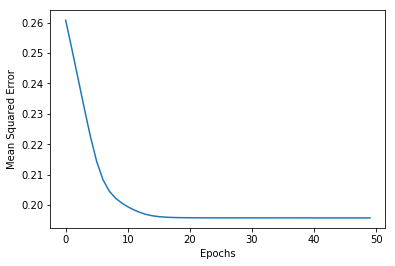

In [79]:
# sn.fit(X_train.values, y_train.values, epochs = 20)

sn_mse = SigmoidNeuron()
sn_mse.fit(X_scaled_train, y_train.values, epochs=50, learning_rate=0.01, loss_fn="mse", display_loss=True)

In [80]:
prediction = sn.predict(X_test.values)